In [2]:
import pickle
import numpy as np
import sys

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.path as mpath

In [3]:
sys.path.append("/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/")
import LIM_utils_kb as limkb

In [4]:
import importlib
importlib.reload(limkb)

<module 'LIM_utils_kb' from '/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/LIM_utils_kb.py'>

In [5]:
train_dsource = 'cesm_lme'
ntrunc = 30 

In [6]:
if 'hist_ssp585' in train_dsource: 
    folder_add = 'hist_ssp585_concatenated/'
elif 'hist' in train_dsource: 
    folder_add = 'historical/'
elif 'lm' in train_dsource: 
    folder_add = 'last_millennium/'
elif 'satellite' in train_dsource: 
    folder_add = 'satellite/'
elif 'era5' in train_dsource: 
    folder_add = 'reanalysis/'
elif 'lme' in train_dsource: 
    folder_add = 'last_millennium/'

save_folder = '/home/disk/kalman2/mkb22/SI_LIMs/enm_analysis/'+folder_add

In [7]:
units = {'tas':'K', 'psl':'Pa','zg':'m',
         'tos':'K','sit':'m','sic':'%'}
long_names = {'tas':'2m air temperature', 'psl':'Sea level pressure','zg':'Geopotential height at 500 hPa',
              'tos':'Sea surface temperature','sit':'Sea ice thickness','sic':'Sea ice concentration'}

## Check all modes run: 

In [8]:
filename = ('LIMcast_allmodes_cesm_lme_002_ntrain_850_1650_validyrs_1651_1850_'+
            'tas'+str(ntrunc)+'_psl'+str(ntrunc)+'_zg'+str(ntrunc)+'_tos'+str(ntrunc)+
            '_sit'+str(ntrunc)+'_sic'+str(ntrunc)+'_20211201.pkl')

experiment_all = pickle.load(open(save_folder+filename, 'rb'))

valid_lags_all = experiment_all['forecast_validation_lags']['validation_stats_lags']
exp_setup_all = experiment_all['forecast_validation_lags']['exp_setup']

In [9]:
data_dir = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/neofs/last_millennium/'
data_name = ('LIMcast_cesm_lme_002_ntrain_850_1650_validyrs_1651_1850_'+
             'tas'+str(ntrunc)+'_psl'+str(ntrunc)+'_zg'+str(ntrunc)+'_tos'+str(ntrunc)+
             '_sit'+str(ntrunc)+'_sic'+str(ntrunc)+'_20211113.pkl')

lim_data = pickle.load(open(data_dir+data_name, "rb" ) )

limvars = lim_data['LIMd']['exp_setup']['limvars']
LIMd_all = lim_data['LIMd']

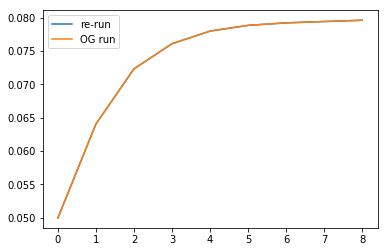

In [10]:
var ='sic'
plt.plot(valid_lags_all[var]['gm_rmse'],label='re-run')
plt.plot(lim_data['forecast_validation_lags']['validation_stats_lags'][var]['gm_rmse'],label='OG run')
plt.legend()

## Jacknife experiments: 

In [94]:
nmodes = 180
valid_lags_sic_gm_rmse = np.zeros((nmodes,9))

for n in range(nmodes):
    print('Working on mode '+str(n))
    filename = ('LIMcast_mode'+str(n)+'rm_cesm_lme_002_ntrain_850_1650_validyrs_1651_1850_'+
                'tas'+str(ntrunc)+'_psl'+str(ntrunc)+'_zg'+str(ntrunc)+'_tos'+str(ntrunc)+
                '_sit'+str(ntrunc)+'_sic'+str(ntrunc)+'_20211201.pkl')
    
    experiment = pickle.load(open(save_folder+filename, 'rb'))

    valid_lags = experiment['forecast_validation_lags']['validation_stats_lags']
    exp_setup = experiment['forecast_validation_lags']['exp_setup']
    
    valid_lags_sic_gm_rmse[n,:] = valid_lags['sic']['gm_rmse']

Working on mode 0
Working on mode 1
Working on mode 2
Working on mode 3
Working on mode 4
Working on mode 5
Working on mode 6
Working on mode 7
Working on mode 8
Working on mode 9
Working on mode 10
Working on mode 11
Working on mode 12
Working on mode 13
Working on mode 14
Working on mode 15
Working on mode 16
Working on mode 17
Working on mode 18
Working on mode 19
Working on mode 20
Working on mode 21
Working on mode 22
Working on mode 23
Working on mode 24
Working on mode 25
Working on mode 26
Working on mode 27
Working on mode 28
Working on mode 29
Working on mode 30
Working on mode 31
Working on mode 32
Working on mode 33
Working on mode 34
Working on mode 35
Working on mode 36
Working on mode 37
Working on mode 38
Working on mode 39
Working on mode 40
Working on mode 41
Working on mode 42
Working on mode 43
Working on mode 44
Working on mode 45
Working on mode 46
Working on mode 47
Working on mode 48
Working on mode 49
Working on mode 50
Working on mode 51
Working on mode 52
Wor

(array([0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 ]), <a list of 10 Text yticklabel objects>)

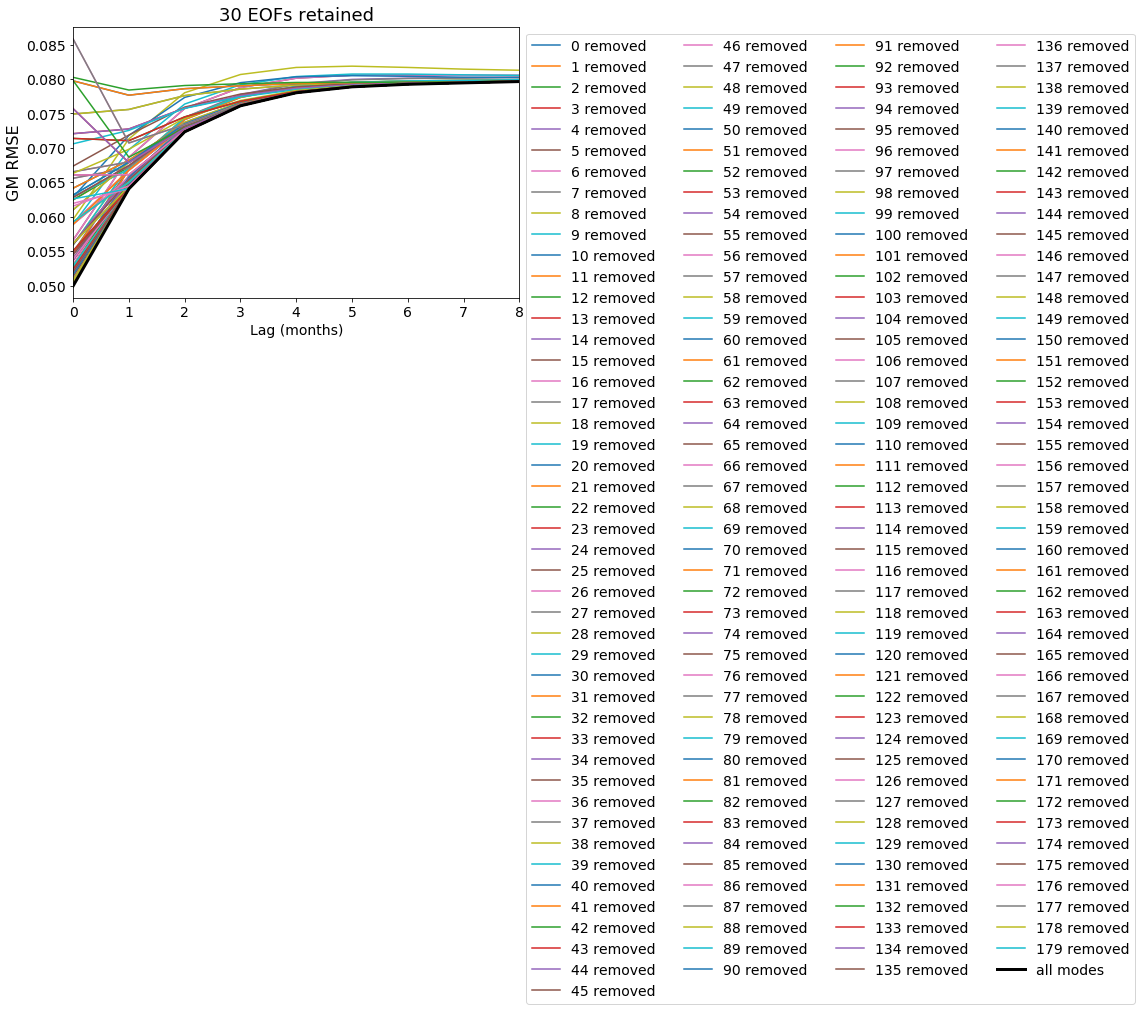

In [95]:
fig = plt.figure(figsize=(8,5))

for i in range(nmodes):
    plt.plot(valid_lags_sic_gm_rmse[i,:], label=str(i)+' removed', linestyle='-')

plt.plot(lim_data['forecast_validation_lags']['validation_stats_lags']['sic']['gm_rmse'], 
         label='all modes', linewidth=3,color='k')

plt.xlim(0,8)
# plt.ylim(0.059,0.062)
plt.legend(bbox_to_anchor=[1,1],ncol=4, fontsize=14)
plt.ylabel('GM RMSE', fontsize=16)
plt.xlabel('Lag (months)', fontsize=14)
plt.title(str(ntrunc)+' EOFs retained', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [96]:
gm_rmse_allmodes = lim_data['forecast_validation_lags']['validation_stats_lags']['sic']['gm_rmse']

In [106]:
np.argmax(valid_lags_sic_gm_rmse[:60,1])

47

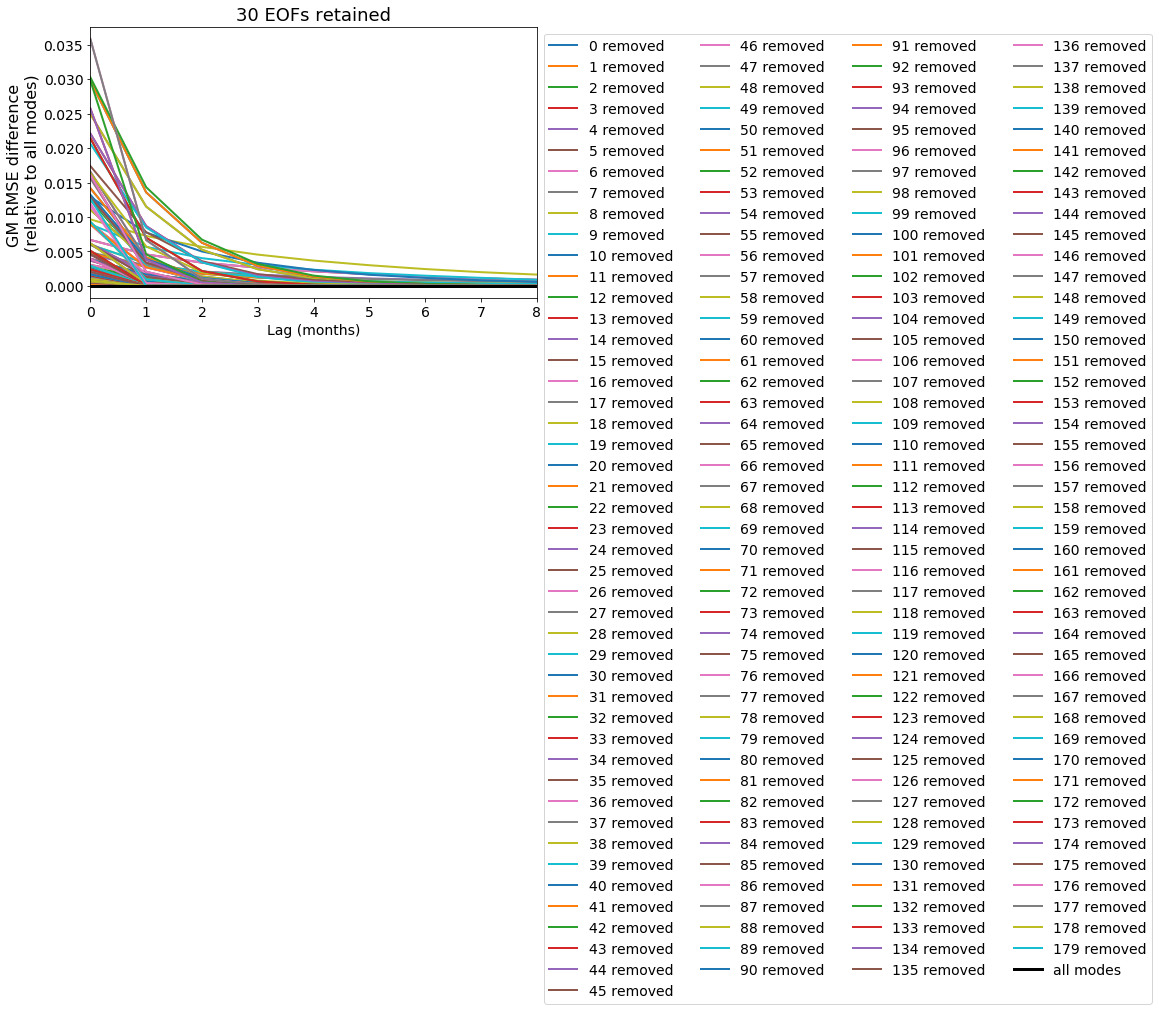

In [97]:
fig = plt.figure(figsize=(8,5))

for i in range(nmodes):
    plt.plot(valid_lags_sic_gm_rmse[i,:]-gm_rmse_allmodes, label=str(i)+' removed', linestyle='-', linewidth=2)

plt.axhline(0,label='all modes', color='k', linewidth=3)

plt.ylabel('GM RMSE difference \n(relative to all modes)', fontsize=16)
plt.xlabel('Lag (months)', fontsize=14)
plt.title(str(ntrunc)+' EOFs retained', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(0,8)
# plt.ylim(0.059,0.062)
plt.legend(bbox_to_anchor=[1,1],ncol=4, fontsize=14)

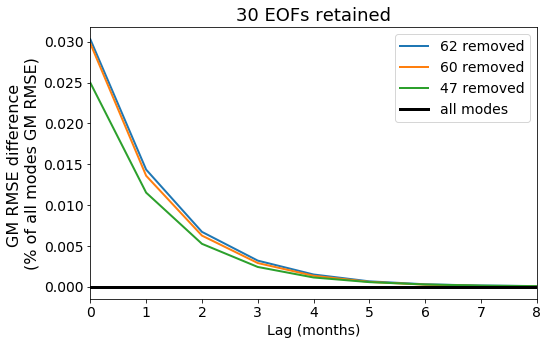

In [108]:
fig = plt.figure(figsize=(8,5))

plt.plot((valid_lags_sic_gm_rmse[62,:]-gm_rmse_allmodes),label='62 removed', linestyle='-', linewidth=2)
plt.plot((valid_lags_sic_gm_rmse[60,:]-gm_rmse_allmodes),label='60 removed', linestyle='-', linewidth=2)
plt.plot((valid_lags_sic_gm_rmse[47,:]-gm_rmse_allmodes),label='47 removed', linestyle='-', linewidth=2)

#plt.plot((valid_lags_sic_gm_rmse[0,:]-gm_rmse_allmodes),label='0 removed', linestyle='-', linewidth=2)

plt.axhline(0,label='all modes', color='k', linewidth=3)

plt.ylabel('GM RMSE difference \n(% of all modes GM RMSE)', fontsize=16)
plt.xlabel('Lag (months)', fontsize=14)
plt.title(str(ntrunc)+' EOFs retained', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(0,8)
# plt.ylim(0.059,0.062)
plt.legend(bbox_to_anchor=[1,1], fontsize=14)

In [52]:
LIMd_all['lam_L_adj'][30], LIMd_all['lam_L_adj'][18], LIMd_all['lam_L_adj'][19]

((-0.17942801443573164+0j),
 (-0.10510668845577403+0j),
 (-0.11918040406831794+0j))

In [108]:
lim_data['LIMd']['vec'].shape, lim_data['LIMd']['veci'].shape, lim_data['LIMd']['lam_L_adj'].shape

((300, 300), (300, 300), (300,))

In [119]:
lim_data['LIMd']['E3_all'].shape

(60704, 250)

In [109]:
lim_data['LIMd']['lam_L_adj'][35]

(-0.15591303243466337+0j)

In [110]:
lim_data['LIMd']['lam_L_adj'][36]

(-0.16810690713003096+0j)

In [52]:
lim_data['LIMd']['vec'].shape[1]

180

In [109]:
lim_eigvec_62 = lim_data['LIMd']['vec'][:,62]
lim_eigvec_60 = lim_data['LIMd']['vec'][:,60]
lim_eigvec_47 = lim_data['LIMd']['vec'][:,47]

In [110]:
E_all = np.zeros(((lim_data['LIMd']['E3_all'].shape[0]+ lim_data['LIMd']['E_sic'].shape[0]),ntrunc*6))
E_all[0:lim_data['LIMd']['E3_all'].shape[0],0:ntrunc*5] = lim_data['LIMd']['E3_all']
E_all[lim_data['LIMd']['E3_all'].shape[0]:,ntrunc*5:] = lim_data['LIMd']['E_sic']

lim_eigvec_60_dc = np.matmul(E_all,lim_eigvec_60)
lim_eigvec_62_dc = np.matmul(E_all,lim_eigvec_62)
lim_eigvec_47_dc = np.matmul(E_all,lim_eigvec_47)

if lim_data['LIMd']['exp_setup']['Weight'] is True: 
    lim_eigvec_62_decomp = limkb.unweight_decompressed_vars(lim_eigvec_62_dc, limvars, 
                                                            lim_data['LIMd']['var_dict'],
                                                            lim_data['LIMd']['W_all'])
    lim_eigvec_60_decomp = limkb.unweight_decompressed_vars(lim_eigvec_60_dc, limvars, 
                                                            lim_data['LIMd']['var_dict'], 
                                                            lim_data['LIMd']['W_all'])
    lim_eigvec_47_decomp = limkb.unweight_decompressed_vars(lim_eigvec_47_dc, limvars, 
                                                            lim_data['LIMd']['var_dict'], 
                                                            lim_data['LIMd']['W_all'])
else: 
    lim_eigvec_60_decomp = lim_eigvec_60_dc
    lim_eigvec_62_decomp = lim_eigvec_62_dc
    lim_eigvec_47_decomp = lim_eigvec_47_dc

/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/LIM_utils_kb.py:1081: RuntimeWarning: divide by zero encountered in true_divide
  X_out[start:start+inds_end] = x_train_dcomp[start:start+inds_end]/W_all[var][:]
/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/LIM_utils_kb.py:1081: RuntimeWarning: invalid value encountered in true_divide
  X_out[start:start+inds_end] = x_train_dcomp[start:start+inds_end]/W_all[var][:]


In [50]:
np.zeros((lim_eigvec_1_decomp.shape[0]))

((86304,), (86304,))

In [54]:
lim_eigvec_decomp = np.zeros((lim_data['LIMd']['vec'].shape[1],
                              lim_eigvec_4_decomp.shape[0]))

for n in range(lim_data['LIMd']['vec'].shape[1]):
    print('Working on mode '+str(n))

    lim_eigvec = lim_data['LIMd']['vec'][:,n]
    lim_eigvec_dc = np.matmul(E_all,lim_eigvec)

    if lim_data['LIMd']['exp_setup']['Weight'] is True: 
        lim_eigvec_decomp[n,:] = limkb.unweight_decompressed_vars(lim_eigvec_dc, limvars, 
                                                                lim_data['LIMd']['var_dict'],
                                                                lim_data['LIMd']['W_all'])
    else: 
        lim_eigvec_decomp[n,:] = lim_eigvec_dc

Working on mode 0
Working on mode 1
Working on mode 2
Working on mode 3
Working on mode 4


/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/LIM_utils_kb.py:1081: RuntimeWarning: divide by zero encountered in true_divide
  X_out[start:start+inds_end] = x_train_dcomp[start:start+inds_end]/W_all[var][:]
/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/LIM_utils_kb.py:1081: RuntimeWarning: invalid value encountered in true_divide
  X_out[start:start+inds_end] = x_train_dcomp[start:start+inds_end]/W_all[var][:]
/home/disk/chaos/mkb22/anaconda2/envs/lims/lib/python3.6/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


Working on mode 5
Working on mode 6
Working on mode 7
Working on mode 8
Working on mode 9
Working on mode 10
Working on mode 11
Working on mode 12
Working on mode 13
Working on mode 14
Working on mode 15
Working on mode 16
Working on mode 17
Working on mode 18
Working on mode 19
Working on mode 20
Working on mode 21
Working on mode 22
Working on mode 23
Working on mode 24
Working on mode 25
Working on mode 26
Working on mode 27
Working on mode 28
Working on mode 29
Working on mode 30
Working on mode 31
Working on mode 32
Working on mode 33
Working on mode 34
Working on mode 35
Working on mode 36
Working on mode 37
Working on mode 38
Working on mode 39
Working on mode 40
Working on mode 41
Working on mode 42
Working on mode 43
Working on mode 44
Working on mode 45
Working on mode 46
Working on mode 47
Working on mode 48
Working on mode 49
Working on mode 50
Working on mode 51
Working on mode 52
Working on mode 53
Working on mode 54
Working on mode 55
Working on mode 56
Working on mode 5

In [58]:
inds_var = lim_data['LIMd']['var_dict']['tos']['var_inds']

lim_eigvec_decomp_tos_2d = np.real(lim_eigvec_decomp[:,inds_var])

In [72]:
np.var(lim_eigvec_decomp_tos_2d[0,np.logical_not(np.isnan(lim_eigvec_decomp_tos_2d[0,:]))])

/home/disk/chaos/mkb22/anaconda2/envs/lims/lib/python3.6/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


nan

In [ ]:
np.nanvar(lim_eigvec_decomp_tos_2d,axis=1)

In [73]:
np.isinf(lim_eigvec_decomp_tos_2d).sum()

817920

In [85]:
var_tos_eigvec = np.zeros((180))

for i in range(180):
    var_tos_eigvec[i] = np.nanvar(np.where(np.isinf(lim_eigvec_decomp_tos_2d[i,:]),
                                           0,lim_eigvec_decomp_tos_2d[i,:]))

Text(0,0.5,'Sorted SST varaince')

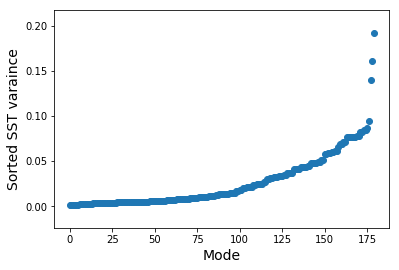

In [90]:
plt.scatter(np.arange(0,180,1),np.sort(var_tos_eigvec))
plt.xlabel('Mode', fontsize=14)
plt.ylabel('Sorted SST varaince', fontsize=14)

In [91]:
np.where(var_tos_eigvec>0.1)

(array([18, 55, 62]),)

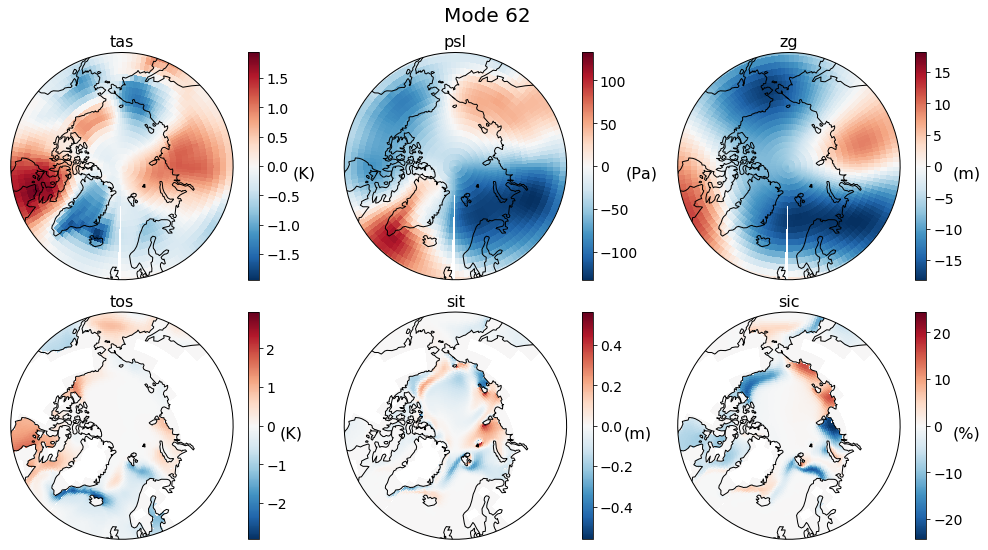

In [115]:
fig, axs = plt.subplots(2,3,figsize=(14,8),subplot_kw={'projection': ccrs.NorthPolarStereo()})
ax = axs.flatten()
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

for i,var in enumerate(limvars):
    inds_var = lim_data['LIMd']['var_dict'][var]['var_inds']
    
    nlat = lim_data['LIMd']['var_dict'][var]['lat'].shape[0]
    nlon_shape = lim_data['LIMd']['var_dict'][var]['lon'].shape
    lat_mask = np.logical_not(np.isnan(LIMd_all['var_dict'][var]['lat']))*np.ones((LIMd_all['var_dict'][var]['lat'].shape))
    lon_mask = np.logical_not(np.isnan(LIMd_all['var_dict'][var]['lon']))*np.ones((LIMd_all['var_dict'][var]['lon'].shape))
    
    if len(nlon_shape)>1:
        nlon = nlon_shape[1]
    else: 
        nlon = nlon_shape[0]

    if var=='sic':
        lim_eigvec_62_decomp_2d = np.real(np.reshape(lim_eigvec_62_decomp[inds_var], (nlat,nlon)))*100
        lat = LIMd_all['var_dict']['tos']['lat']
        lon = LIMd_all['var_dict']['tos']['lon']
    elif var=='sit':
        lim_eigvec_62_decomp_2d = np.real(np.reshape(lim_eigvec_62_decomp[inds_var], (nlat,nlon)))
        lat = LIMd_all['var_dict']['tos']['lat']
        lon = LIMd_all['var_dict']['tos']['lon']
    else: 
        lim_eigvec_62_decomp_2d = np.real(np.reshape(lim_eigvec_62_decomp[inds_var], (nlat,nlon)))
        lat = LIMd_all['var_dict'][var]['lat']
        lon = LIMd_all['var_dict'][var]['lon']
    
    
    max_vec = np.nanmax(lim_eigvec_62_decomp_2d[np.isfinite(lim_eigvec_62_decomp_2d)])
    min_vec = np.nanmin(lim_eigvec_62_decomp_2d[np.isfinite(lim_eigvec_62_decomp_2d)])
    max_val = np.max([np.abs(max_vec),np.abs(min_vec)])
    
#    ax[i].set_title(long_names[var], fontsize=16)
    ax[i].set_title(var, fontsize=16)
    ax[i].coastlines()
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax[i].set_boundary(circle, transform=ax[i].transAxes)
    ax[i].set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
    
#    m = np.max(np.abs(eof_3d[(trunc_data['var_dict'][var]['lat']>0),mode]))
    cf = ax[i].pcolormesh(lon,lat,
                          lim_eigvec_62_decomp_2d,
                          cmap='RdBu_r', 
                          transform=ccrs.PlateCarree(),vmin=-max_val,vmax=max_val)
    cbar = fig.colorbar(cf, ax=ax[i])
    cbar.set_label('('+units[var]+')',fontsize=16, rotation=360)
    cbar.ax.tick_params(labelsize=14)
    
plt.suptitle('Mode 62', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

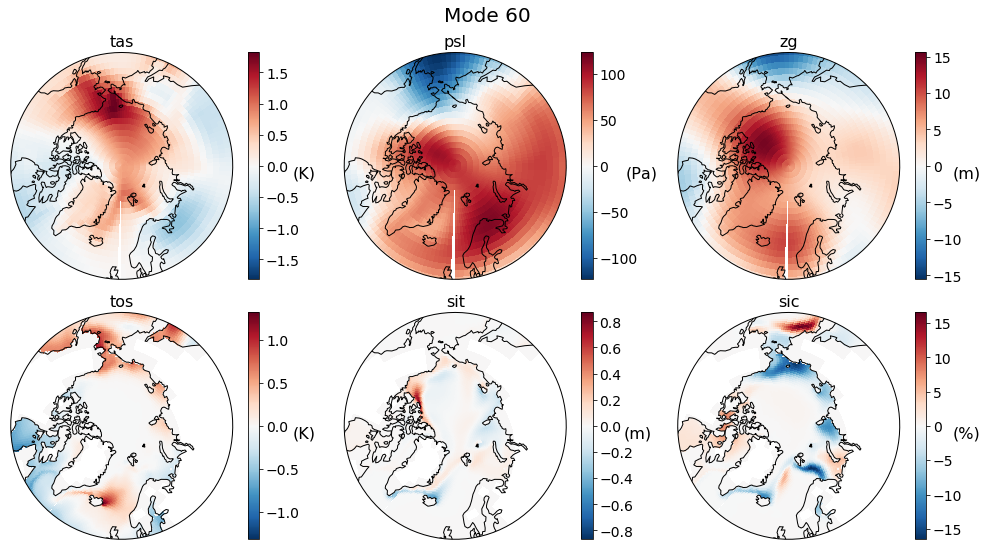

In [116]:
fig, axs = plt.subplots(2,3,figsize=(14,8),subplot_kw={'projection': ccrs.NorthPolarStereo()})
ax = axs.flatten()
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

for i,var in enumerate(limvars):
    inds_var = lim_data['LIMd']['var_dict'][var]['var_inds']
    
    nlat = lim_data['LIMd']['var_dict'][var]['lat'].shape[0]
    nlon_shape = lim_data['LIMd']['var_dict'][var]['lon'].shape
    lat_mask = np.logical_not(np.isnan(LIMd_all['var_dict'][var]['lat']))*np.ones((LIMd_all['var_dict'][var]['lat'].shape))
    lon_mask = np.logical_not(np.isnan(LIMd_all['var_dict'][var]['lon']))*np.ones((LIMd_all['var_dict'][var]['lon'].shape))
    
    if len(nlon_shape)>1:
        nlon = nlon_shape[1]
    else: 
        nlon = nlon_shape[0]

    if var=='sic':
        lim_eigvec_60_decomp_2d = np.real(np.reshape(lim_eigvec_60_decomp[inds_var], (nlat,nlon)))*100
        lat = LIMd_all['var_dict']['tos']['lat']
        lon = LIMd_all['var_dict']['tos']['lon']
    elif var=='sit':
        lim_eigvec_60_decomp_2d = np.real(np.reshape(lim_eigvec_60_decomp[inds_var], (nlat,nlon)))
        lat = LIMd_all['var_dict']['tos']['lat']
        lon = LIMd_all['var_dict']['tos']['lon']
    else: 
        lim_eigvec_60_decomp_2d = np.real(np.reshape(lim_eigvec_60_decomp[inds_var], (nlat,nlon)))
        lat = LIMd_all['var_dict'][var]['lat']
        lon = LIMd_all['var_dict'][var]['lon']
    
    
    max_vec = np.nanmax(lim_eigvec_60_decomp_2d[np.isfinite(lim_eigvec_60_decomp_2d)])
    min_vec = np.nanmin(lim_eigvec_60_decomp_2d[np.isfinite(lim_eigvec_60_decomp_2d)])
    max_val = np.max([np.abs(max_vec),np.abs(min_vec)])
    
#    ax[i].set_title(long_names[var], fontsize=16)
    ax[i].set_title(var, fontsize=16)
    ax[i].coastlines()
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax[i].set_boundary(circle, transform=ax[i].transAxes)
    ax[i].set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
    
#    m = np.max(np.abs(eof_3d[(trunc_data['var_dict'][var]['lat']>0),mode]))
    cf = ax[i].pcolormesh(lon,lat,
                          lim_eigvec_60_decomp_2d,
                          cmap='RdBu_r', 
                          transform=ccrs.PlateCarree(),vmin=-max_val,vmax=max_val)
    cbar = fig.colorbar(cf, ax=ax[i])
    cbar.set_label('('+units[var]+')',fontsize=16, rotation=360)
    cbar.ax.tick_params(labelsize=14)
    
plt.suptitle('Mode 60', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

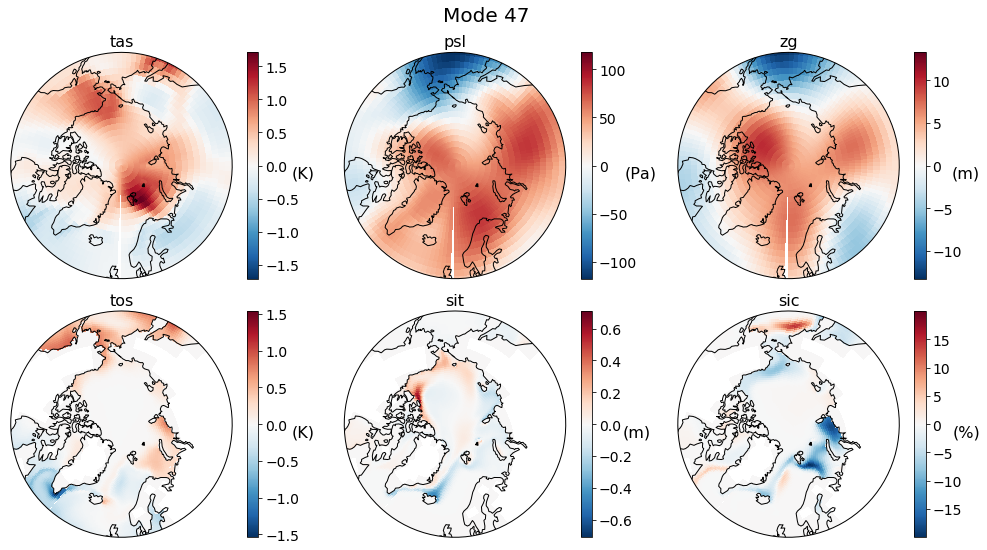

In [117]:
fig, axs = plt.subplots(2,3,figsize=(14,8),subplot_kw={'projection': ccrs.NorthPolarStereo()})
ax = axs.flatten()
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

for i,var in enumerate(limvars):
    inds_var = lim_data['LIMd']['var_dict'][var]['var_inds']
    
    nlat = lim_data['LIMd']['var_dict'][var]['lat'].shape[0]
    nlon_shape = lim_data['LIMd']['var_dict'][var]['lon'].shape
    lat_mask = np.logical_not(np.isnan(LIMd_all['var_dict'][var]['lat']))*np.ones((LIMd_all['var_dict'][var]['lat'].shape))
    lon_mask = np.logical_not(np.isnan(LIMd_all['var_dict'][var]['lon']))*np.ones((LIMd_all['var_dict'][var]['lon'].shape))
    
    if len(nlon_shape)>1:
        nlon = nlon_shape[1]
    else: 
        nlon = nlon_shape[0]

    if var=='sic':
        lim_eigvec_47_decomp_2d = np.real(np.reshape(lim_eigvec_47_decomp[inds_var], (nlat,nlon)))*100
        lat = LIMd_all['var_dict']['tos']['lat']
        lon = LIMd_all['var_dict']['tos']['lon']
    elif var=='sit':
        lim_eigvec_47_decomp_2d = np.real(np.reshape(lim_eigvec_47_decomp[inds_var], (nlat,nlon)))
        lat = LIMd_all['var_dict']['tos']['lat']
        lon = LIMd_all['var_dict']['tos']['lon']
    else: 
        lim_eigvec_47_decomp_2d = np.real(np.reshape(lim_eigvec_47_decomp[inds_var], (nlat,nlon)))
        lat = LIMd_all['var_dict'][var]['lat']
        lon = LIMd_all['var_dict'][var]['lon']
    
    
    max_vec = np.nanmax(lim_eigvec_47_decomp_2d[np.isfinite(lim_eigvec_47_decomp_2d)])
    min_vec = np.nanmin(lim_eigvec_47_decomp_2d[np.isfinite(lim_eigvec_47_decomp_2d)])
    max_val = np.max([np.abs(max_vec),np.abs(min_vec)])
    
#    ax[i].set_title(long_names[var], fontsize=16)
    ax[i].set_title(var, fontsize=16)
    ax[i].coastlines()
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax[i].set_boundary(circle, transform=ax[i].transAxes)
    ax[i].set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
    
#    m = np.max(np.abs(eof_3d[(trunc_data['var_dict'][var]['lat']>0),mode]))
    cf = ax[i].pcolormesh(lon,lat,
                          lim_eigvec_47_decomp_2d,
                          cmap='RdBu_r', 
                          transform=ccrs.PlateCarree(),vmin=-max_val,vmax=max_val)
    cbar = fig.colorbar(cf, ax=ax[i])
    cbar.set_label('('+units[var]+')',fontsize=16, rotation=360)
    cbar.ax.tick_params(labelsize=14)
    
plt.suptitle('Mode 47', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
fig, axs = plt.subplots(2,3,figsize=(14,8),subplot_kw={'projection': ccrs.NorthPolarStereo()})
ax = axs.flatten()
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

for i,var in enumerate(limvars):
    inds_var = lim_data['LIMd']['var_dict'][var]['var_inds']
    
    nlat = lim_data['LIMd']['var_dict'][var]['lat'].shape[0]
    nlon_shape = lim_data['LIMd']['var_dict'][var]['lon'].shape
    lat_mask = np.logical_not(np.isnan(LIMd_all['var_dict'][var]['lat']))*np.ones((LIMd_all['var_dict'][var]['lat'].shape))
    lon_mask = np.logical_not(np.isnan(LIMd_all['var_dict'][var]['lon']))*np.ones((LIMd_all['var_dict'][var]['lon'].shape))
    
    if len(nlon_shape)>1:
        nlon = nlon_shape[1]
    else: 
        nlon = nlon_shape[0]

    if var=='sic':
        lim_eigvec_30_decomp_2d = np.real(np.reshape(lim_eigvec_30_decomp[inds_var], (nlat,nlon)))*100
    else: 
        lim_eigvec_30_decomp_2d = np.real(np.reshape(lim_eigvec_30_decomp[inds_var], (nlat,nlon)))
    
    
    max_vec = np.nanmax(lim_eigvec_30_decomp_2d[np.isfinite(lim_eigvec_30_decomp_2d)])
    min_vec = np.nanmin(lim_eigvec_30_decomp_2d[np.isfinite(lim_eigvec_30_decomp_2d)])
    max_val = np.max([np.abs(max_vec),np.abs(min_vec)])
    
#    ax[i].set_title(long_names[var], fontsize=16)
    ax[i].set_title(var, fontsize=16)
    ax[i].coastlines()
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax[i].set_boundary(circle, transform=ax[i].transAxes)
    ax[i].set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
    
#    m = np.max(np.abs(eof_3d[(trunc_data['var_dict'][var]['lat']>0),mode]))
    cf = ax[i].pcolormesh(np.nan_to_num(LIMd_all['var_dict'][var]['lon']),#*lon_mask, #[:,:,0],
                          np.nan_to_num(LIMd_all['var_dict'][var]['lat']),#*lat_mask, #[:,:,0],
                          lim_eigvec_30_decomp_2d,
                          cmap='RdBu_r', 
                          transform=ccrs.PlateCarree(),vmin=-max_val,vmax=max_val)
    cbar = fig.colorbar(cf, ax=ax[i])
    cbar.set_label('('+units[var]+')',fontsize=16, rotation=360)
    cbar.ax.tick_params(labelsize=14)
    
plt.suptitle('Mode 30', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [92]:
efold[18], efold[55], efold[66]

(9.514142388957218, 2.7654573046045456, 2.0020256146865885)

In [93]:
freq[18], freq[55], freq[66]

(0.0, 0.0, 0.02976877355642861)

(-1, 185)

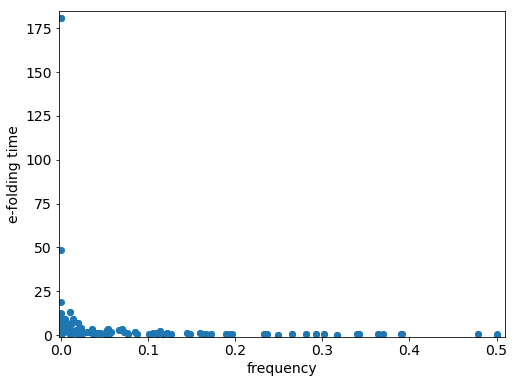

In [41]:
efold = -1/np.real(LIMd_all['lam_L_adj'])
freq = np.abs(np.imag(LIMd_all['lam_L_adj']/(2*np.pi)))

fig = plt.figure(figsize=(8,6))
plt.scatter(freq,efold)

# plt.axhline(0,color='k')
# plt.axvline(0,color='k')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('e-folding time', fontsize=14)
plt.xlabel('frequency', fontsize=14)

plt.xlim(-0.002,0.51)
plt.ylim(-1,185)

In [42]:
np.argmax(efold)

4

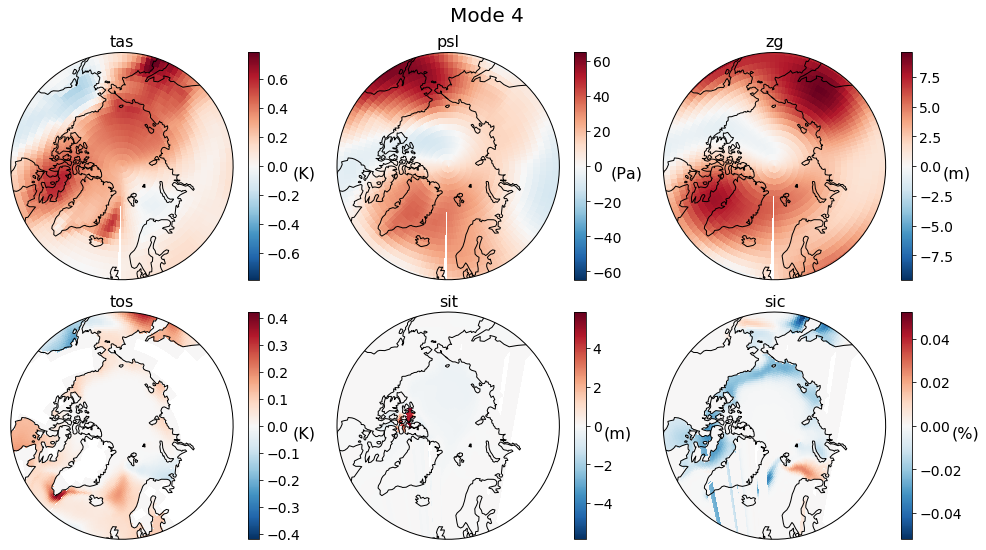

In [48]:
fig, axs = plt.subplots(2,3,figsize=(14,8),subplot_kw={'projection': ccrs.NorthPolarStereo()})
ax = axs.flatten()
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

for i,var in enumerate(limvars):
    inds_var = lim_data['LIMd']['var_dict'][var]['var_inds']
    
    nlat = lim_data['LIMd']['var_dict'][var]['lat'].shape[0]
    nlon_shape = lim_data['LIMd']['var_dict'][var]['lon'].shape

    if len(nlon_shape)>1:
        nlon = nlon_shape[1]
    else: 
        nlon = nlon_shape[0]

    lim_eigvec_4_decomp_2d = np.real(np.reshape(lim_eigvec_4_decomp[inds_var], (nlat,nlon)))
    
    max_vec = np.nanmax(lim_eigvec_4_decomp_2d[np.isfinite(lim_eigvec_4_decomp_2d)])
    min_vec = np.nanmin(lim_eigvec_4_decomp_2d[np.isfinite(lim_eigvec_4_decomp_2d)])
    max_val = np.max([np.abs(max_vec),np.abs(min_vec)])
    
    ax[i].set_title(var, fontsize=16)
    ax[i].coastlines()
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax[i].set_boundary(circle, transform=ax[i].transAxes)
    ax[i].set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
    
#    m = np.max(np.abs(eof_3d[(trunc_data['var_dict'][var]['lat']>0),mode]))
    cf = ax[i].pcolormesh(np.nan_to_num(LIMd_all['var_dict'][var]['lon']),#*lon_mask, #[:,:,0],
                          np.nan_to_num(LIMd_all['var_dict'][var]['lat']),#*lat_mask, #[:,:,0],
                          lim_eigvec_4_decomp_2d,
                          cmap='RdBu_r', 
                          transform=ccrs.PlateCarree(),vmin=-max_val,vmax=max_val)
    cbar = fig.colorbar(cf, ax=ax[i])
    cbar.set_label('('+units[var]+')',fontsize=16, rotation=360)
    cbar.ax.tick_params(labelsize=14)
    
plt.suptitle('Mode 4', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [21]:
valid_lags_sic_gm_rmse

array([[0.03787151, 0.05992499, 0.07055096, 0.07498192, 0.07720632,
        0.07823267, 0.07870246, 0.07897025, 0.07921947],
       [0.03762839, 0.05972768, 0.07036195, 0.07481309, 0.07705619,
        0.07809346, 0.0785588 , 0.07881386, 0.07904766],
       [0.03808237, 0.05997281, 0.07052459, 0.07494879, 0.07719325,
        0.07823357, 0.07869664, 0.07894418, 0.07916997],
       [0.03843117, 0.06041326, 0.07091437, 0.07526198, 0.07743554,
        0.07843393, 0.07888725, 0.07914325, 0.07937776]])

In [ ]:
(valid_lags_sic_gm_rmse[:,2]) - valid_lags_sic_gm_rmse[0,2]

In [ ]:
plt.plot(valid_lags_sic_gm_rmse.T)
plt.plot(lim_data['forecast_validation_lags']['validation_stats_lags']['sic']['gm_rmse'])

In [ ]:
filename2 = ('LIMcast_allmodes_cesm_lme_002_ntrain_850_1650_validyrs_1651_1850_'+
                'tas'+str(ntrunc)+'_psl'+str(ntrunc)+'_zg'+str(ntrunc)+'_tos'+str(ntrunc)+
                '_sit'+str(ntrunc)+'_sic'+str(ntrunc)+'_20211125.pkl')
    
experiment_all = pickle.load(open(save_folder+filename2, 'rb'))

valid_lags_all = experiment_all['forecast_validation_lags']['validation_stats_lags']
exp_setup_all = experiment_all['forecast_validation_lags']['exp_setup']

In [ ]:
filename2

In [ ]:
experiment['LIMd']['lam_L']

In [ ]:
data_dir = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/neofs/last_millennium/'
data_name = 'LIMcast_cesm_lme_002_ntrain_850_1650_validyrs_1651_1850_tas50_psl50_zg50_tos50_sit50_sic50_20211113.pkl'

lim_data = pickle.load(open(data_dir+data_name, "rb" ) )

In [ ]:
lim_data['LIMd']['lam_L']

In [ ]:
plt.plot(lim_data['forecast_validation_lags']['validation_stats_lags']['sic']['gm_rmse']*100)
plt.plot(valid_lags['sic']['gm_rmse'])

In [ ]:
valid_lags['sic']['gm_rmse']

In [ ]:
data_dir = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/neofs/last_millennium/'
data_name = 'LIMcast_cesm_lme_002_ntrain_850_1650_validyrs_1651_1850_tas50_psl50_zg50_tos50_sit50_sic50_20211113.pkl'

lim_data = pickle.load(open(data_dir+data_name, "rb" ) )

In [ ]:
lim_data['forecast_validation_lags']['validation_stats_lags']['sic']['gm_rmse']

In [ ]:
tot = np.sum(lim_data['LIMd']['lam_L']**2)
var_exp = (lim_data['LIMd']['lam_L']**2)/tot

In [ ]:
lim_data['LIMd']['E3_all'].shape,lim_data['LIMd']['E_sic'].shape

In [ ]:
X_train_dcomp = decompress_eof_separate_sic(P_train,nmodes,nmodes_sic,E,E_sic,
                                limvars,var_dict,W_all,Weights=True,
                                sic_separate=False):

In [ ]:
lim_data['LIMd']['E3_all']
lim_data['LIMd']['E_sic']

In [ ]:
plt.plot(lim_data['forecast']['P_train_valid'][251,:])

In [ ]:
plt.plot(experiment['forecast']['P_train_valid'][251,:])

In [ ]:
filename2 = ('LIMcast_cesm_lme_002_ntrain_850_1650_validyrs_1651_1850_'+
             'tas50_psl50_zg50_tos50_sit50_sic50_20211113_2.pkl')
    
experiment_all2 = pickle.load(open(data_dir+filename2, 'rb'))

In [ ]:
plt.plot(experiment_all2['forecast_validation_lags']['validation_stats_lags']['sic']['gm_rmse'])
plt.plot(lim_data['forecast_validation_lags']['validation_stats_lags']['sic']['gm_rmse'])

In [ ]:
experiment_all2['forecast']['x_forecast'].shape